# Notebook

## Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from modules.loader import Loader

In [2]:
loader = Loader()
df_cust = loader.load_customers()
df_inv = loader.load_inventory()
df_sal = loader.load_sales_data()
df_sal = loader.add_channels(df_sal, df_cust)
df_sal = loader.add_nls(df_sal, df_inv)

C:\Users\fpsaw\Desktop\42578-Advanced-Business-Analytics\modules\loader.py:112: FutureWarning: The default value of regex will change from True to False in a future version.
  df['username'] = df['username'].str.replace(


In [3]:
df_cust.head()

,id,name,payer_id,payer_name,city,post_code,country_region_code,is_b2c,latitude,longitude,population
0,00001,Prva dimenzija d.o.o.,00001,Prva dimenzija d.o.o.,medvode,1215,SI,False,46.13049,14.40272,15542.0
1,00002,DOBROTIĆ-MONTAŽA D.O.O.,00002,DOBROTIĆ-MONTAŽA D.O.O.,ivanec,HR-42245,HR,True,46.22306,16.12000,5461.0
2,00003,Masivna Pasivna d.o.o.,00003,Masivna Pasivna d.o.o.,trzin,1236,SI,False,46.12527,14.55256,3844.0
3,00005,ZIDARSKA DELA ZVONKO ŠEBALJ S.P.,00005,ZIDARSKA DELA ZVONKO ŠEBALJ S.P.,leskovec pri krškem,8273,SI,False,45.93566,15.47184,1021.0
4,00006,MARCHIOL d.o.o.,00006,MARCHIOL d.o.o.,nova gorica,5000,SI,True,45.95604,13.64837,13178.0


In [4]:
df_inv.head()

,sku,descr,brand,quantity,last_cost,unit_price,category,NLS
0,00001,NASTAVEK ZA MEŠANJE A F1=60MM,PROLINE,10,0.73,2.28,NaN,False
1,00002,NASTAVEK ZA MEŠANJE MASE 80x400 TIP A,PROLINE,18,1.49,4.86,NaN,False
2,00003,NASTAVEK ZA MEŠANJE MASE 100X500 TIPA,PROLINE,10,2.10,6.15,NaN,False
3,00004,NASTAVEK ZA MEŠANJE MASE 80x400 TIP B,PROLINE,14,1.67,4.86,NaN,False
4,00005,NASTAVEK ZA MEŠANJE MASE 100X500 TIP B,PROLINE,0,1.48,6.00,NaN,False


In [5]:
df_sal.head()

,sku,cust_id,payer_id,invoice_no,ddate,quantity,cost,price,sales_person,is_return,channel,NLS
0,20298,080001,080001,PRA19-00001,2019-07-10,1,-3.31,7.88,SHOP,False,SHOP,False
1,X50137,080001,080001,PRA19-00002,2019-07-10,1,-3.09,6.18,SHOP,False,SHOP,False
2,X51108,080001,080001,PRA19-00002,2019-07-10,1,-1.72,3.64,SHOP,False,SHOP,True
3,10713,080001,080001,PRA19-00006,2019-07-10,1,-2.66,6.33,SHOP,False,SHOP,False
4,1-30-497,901105,901105,PRA19-00007,2019-07-10,2,-5.42,7.26,SHOP,False,SHOP,False


In [7]:
def plot_sales_data(df):
    # Aggregate sales to month-year
    df = df_sal.set_index('ddate')
    df = df.resample('MS').sum()

    # Define plot
    plt.rcParams['figure.figsize'] = [20, 5]
    fig, ax = plt.subplots()
    ax.plot(df.index, df['price'], label="sales")
    
    # Change x_axis to show month and year with correct (centered) intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%B'))
    fmt_month = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)
    ax.ticklabel_format(useOffset=False, style='plain', axis='y')
    
    # Show sales values for each month-year
    for i,j in zip(df.index, df.price):
        ax.annotate(str(int(j)), xy=(i,j))

    # Add lines to locate consecutive years easier
    for year in ['2020', '2021', '2022']:
        ax.axvline(pd.Timestamp(f"{year}-01-01"), color='b', linestyle='--')

    # Final styling options
    plt.title(f"Montly Sales Data")
    plt.xticks(rotation=50)
    plt.grid()
    plt.legend(loc="upper left")
    plt.show()

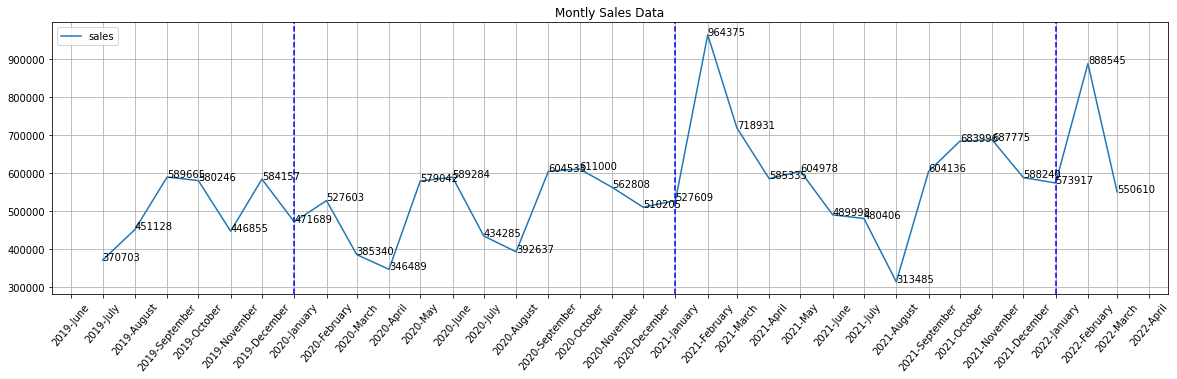

In [8]:
plot_sales_data(df_sal)

## Notes

To ask to CEO:
- More data in sales_data (from 2020, possibly from 2019?) A: will get that tomorrow **DONE**

Questions to CEO:
- Returns -> do they have the same invoice_no? (only in sales) A: No it's different (in quantity + is sales - is return) **DONE: ADDED COL is_return in sales data**
- Negative values in cost, price and quantity? (only in sales) A: The same as quantity (see above) **DONE: returns have negative price, quantity and cost**
- Focus on specific customers? A: (No, its already filtered out, maybe some garbage to remove by us) **TODO: after EDA**
- List useless items to filter out? A: (All items that have SKU starting with 188R...) **DONE: in dataloader**
- Start date for sales data? A: (2019 july) **DONE**
- Some records to remove from sales data? A: (products that have in product description NLS "No Longer Available") **DONE: added NLS in inventory and in df_sal with loader.add_nls**
- SHOP sales_person is that another sales chanel? A: Yes (b2b, b2c and SHOP) **DONE: by updating df_sal with loader.add_channels**

Considerations:
- For Recommendation System: what to do with returns, do we filter out? or include that?
- Sales currency is all in euro and with marginal influence of inflation (we don't need to care about that)

Data Analysis Ideas

- Top sales, margin and quantity items  (best products)
- Top sales, margin and quantity customer (best customers)
- Top sales, margin and quantity brands (best brands)
- Top sales, margin and quantity by sales_person
- Find seasonality in total sales, categories
- Visualize customer location by sales volume
- List top cities by sales, brands and categories
- Find products which are deprecated (haven't been sold for over 6months)
- Association rules for products (products commonly sold together)
- Association rules for categories (categories commonly sold together)
- Check b2b and b2c sales how they compare

- Average invoice_no size (per country) or distribution?
- Sales price distribution for selected products?
- Plot of unit sold and price for selected products, categories, brands by month-year?

- Average life-span of all/selected products? (important for recommendation system)
- Average time between purchases?